## **Example of Additive and Multiplicative Time Series**

<ipython-input-1-cc65ef3b67c6>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2020-01-01', periods=60, freq='M'),


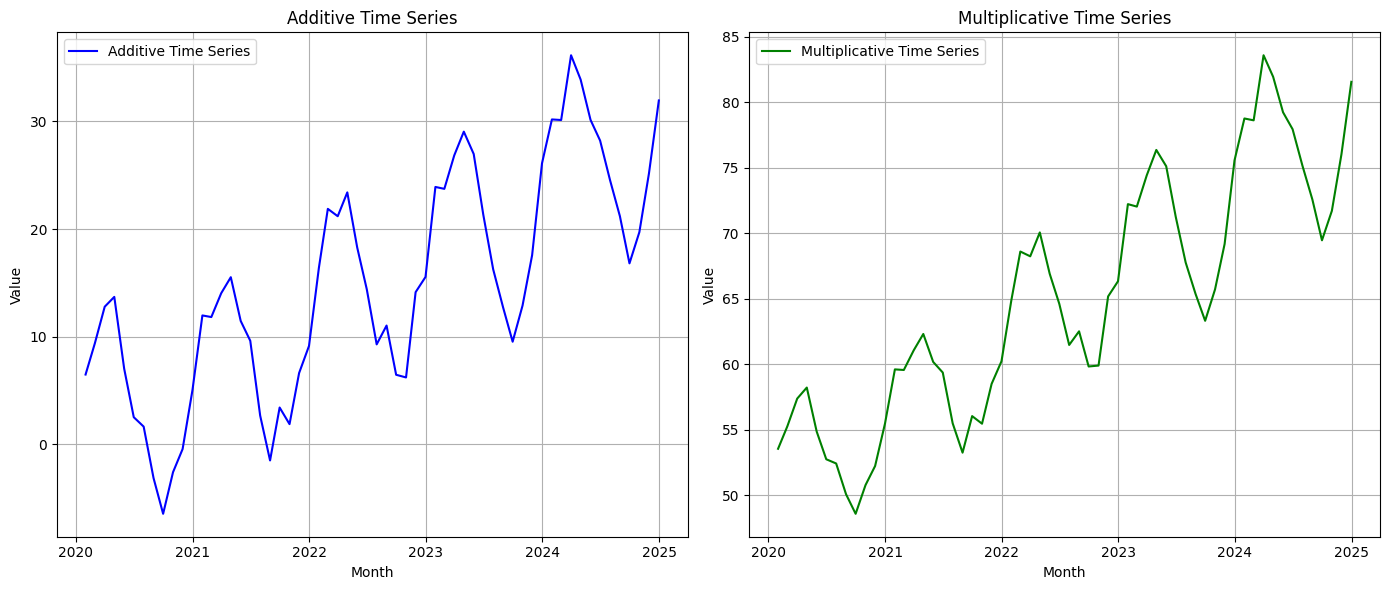

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Create a time range
time = np.arange(1, 61)  # 60 months (~5 years)

# Trend component (e.g., increasing linearly)
trend = 0.5 * time

# Seasonal component (repeats every 12 months)
seasonal = 10 * np.sin(2 * np.pi * time / 12)

# Noise component
noise = np.random.normal(0, 2, size=len(time))

# --- Additive Time Series ---
additive_series = trend + seasonal + noise

# --- Multiplicative Time Series ---
# Ensure all components are positive
multiplicative_series = (trend + 50) * (1 + seasonal/100) * (1 + noise/100)

# Create a DataFrame
df = pd.DataFrame({
    'Month': pd.date_range(start='2020-01-01', periods=60, freq='M'),
    'Trend': trend,
    'Seasonal': seasonal,
    'Noise': noise,
    'Additive': additive_series,
    'Multiplicative': multiplicative_series
})
df.set_index('Month', inplace=True)

# --- Plotting ---
plt.figure(figsize=(14, 6))

# Additive
plt.subplot(1, 2, 1)
plt.plot(df['Additive'], label='Additive Time Series', color='blue')
plt.title('Additive Time Series')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Multiplicative
plt.subplot(1, 2, 2)
plt.plot(df['Multiplicative'], label='Multiplicative Time Series', color='green')
plt.title('Multiplicative Time Series')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


##Using Decomposing to Check Trend, Seasonality:

* always try both Additive and Multiplicative

<Figure size 1200x600 with 0 Axes>

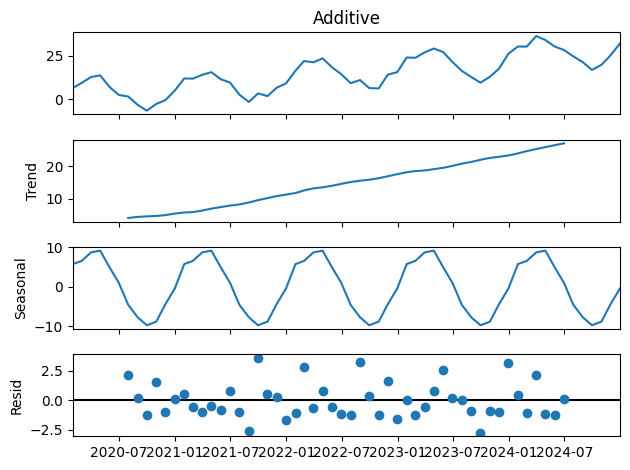

<Figure size 1200x600 with 0 Axes>

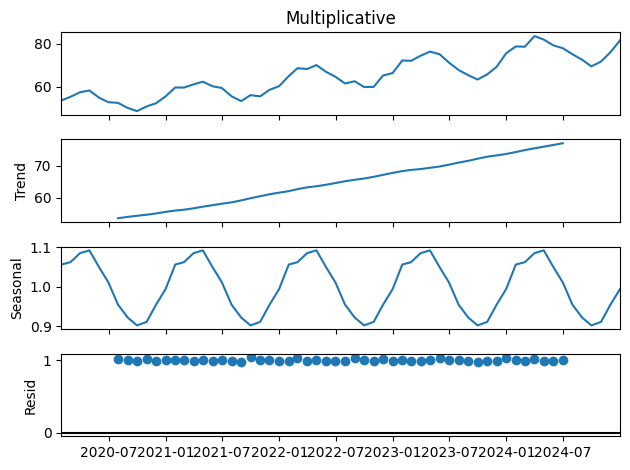

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Using the earlier additive and multiplicative series
# Make sure to have df from previous code (with time series)

# Additive Decomposition
additive_decomp = seasonal_decompose(df['Additive'], model='additive', period=12)
multiplicative_decomp = seasonal_decompose(df['Multiplicative'], model='multiplicative', period=12)

# Plot Additive
plt.figure(figsize=(12, 6))
plt.suptitle("Additive Decomposition", fontsize=14)
additive_decomp.plot()
plt.tight_layout()
plt.show()

# Plot Multiplicative
plt.figure(figsize=(12, 6))
plt.suptitle("Multiplicative Decomposition", fontsize=14)
multiplicative_decomp.plot()
plt.tight_layout()
plt.show()


## **Let's display the trends and seasonality in a DataFrame**

<Figure size 1200x800 with 0 Axes>

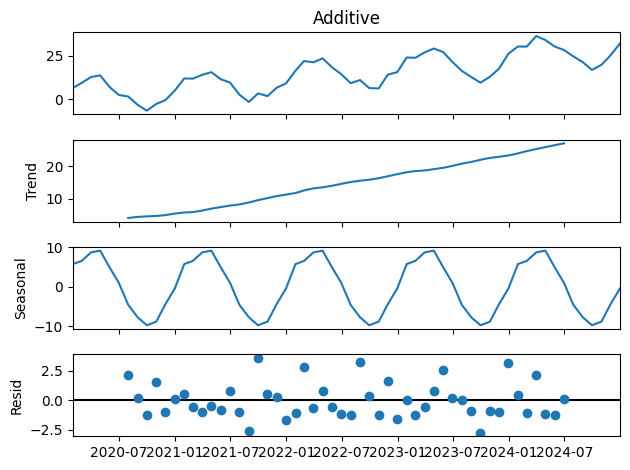

 Additive Decomposition DataFrame:


,Observed,Trend,Seasonal,Residual
Month,,,,
2020-01-31,6.493428,NaN,5.709656,NaN
2020-02-29,9.383725,NaN,6.490353,NaN
2020-03-31,12.795377,NaN,8.656915,NaN
2020-04-30,13.706314,NaN,9.095219,NaN
2020-05-31,7.031693,NaN,4.847597,NaN
2020-06-30,2.531726,NaN,0.979776,NaN
2020-07-31,1.658426,4.070681,-4.596963,2.184707
2020-08-31,-3.125385,4.401534,-7.743942,0.217023
2020-09-30,-6.438949,4.555899,-9.744172,-1.250676


'\n'

In [3]:

# --- Additive Decomposition ---
additive_result = seasonal_decompose(df['Additive'], model='additive', period=12)
df_add_decomp = pd.DataFrame({
    'Observed': additive_result.observed,
    'Trend': additive_result.trend,
    'Seasonal': additive_result.seasonal,
    'Residual': additive_result.resid
})

# --- Plot Additive Decomposition ---
plt.figure(figsize=(12, 8))
plt.suptitle('Additive Decomposition', fontsize=14)
additive_result.plot()
plt.tight_layout()
plt.show()


# Display first few rows
print(" Additive Decomposition DataFrame:")
display(df_add_decomp.head(15), "\n")



 Multiplicative Decomposition DataFrame:


,Observed,Trend,Seasonal,Residual
Month,,,,
2020-01-31,53.551765,NaN,1.056615,NaN
2020-02-29,55.263486,NaN,1.062498,NaN
2020-03-31,57.383831,NaN,1.085421,NaN
2020-04-30,58.224457,NaN,1.092433,NaN
2020-05-31,54.866846,NaN,1.049941,NaN
2020-06-30,52.751815,NaN,1.011495,NaN
2020-07-31,52.430270,53.722441,0.955181,1.021740
2020-08-31,50.080514,54.154239,0.922680,1.002271
2020-09-30,48.589446,54.487029,0.902756,0.987822


'\n'

<Figure size 1200x800 with 0 Axes>

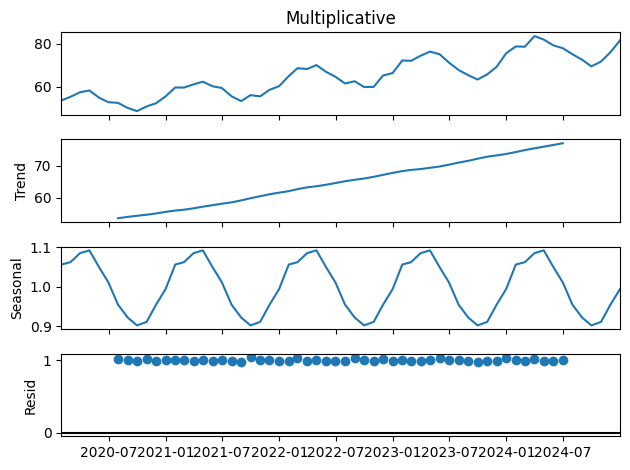

In [4]:

# --- Multiplicative Decomposition ---
multiplicative_result = seasonal_decompose(df['Multiplicative'], model='multiplicative', period=12)
df_mult_decomp = pd.DataFrame({
    'Observed': multiplicative_result.observed,
    'Trend': multiplicative_result.trend,
    'Seasonal': multiplicative_result.seasonal,
    'Residual': multiplicative_result.resid
})


print(" Multiplicative Decomposition DataFrame:")
display(df_mult_decomp.head(15), "\n")



# --- Plot Multiplicative Decomposition ---
plt.figure(figsize=(12, 8))
plt.suptitle('Multiplicative Decomposition', fontsize=14)
multiplicative_result.plot()
plt.tight_layout()
plt.show()
